Moving from A to B with cost 1
Moving from B to C with cost 2
Moving from C to D with cost 1
Final path: ['A', 'B', 'C', 'D'], Total cost: 4


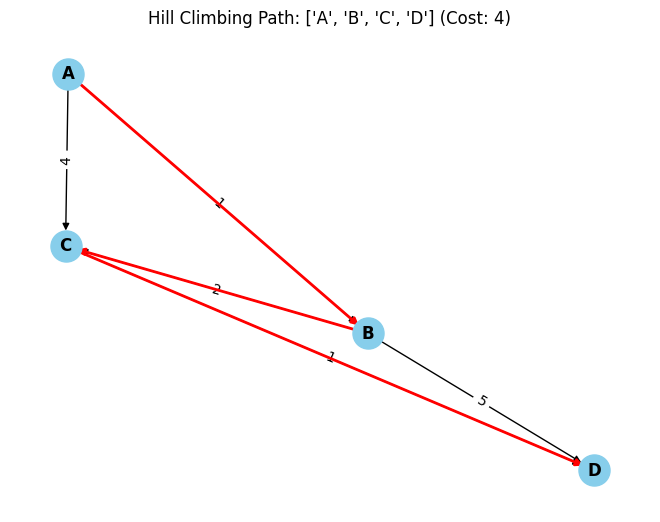

In [5]:
import random
import matplotlib.pyplot as plt
import networkx as nx

graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'C': 2, 'D': 5},
    'C': {'D': 1},
    'D': {}
}

def hill_climb_path(graph, start, goal):
    current_node = start
    path = [current_node]
    while current_node != goal:
        neighbors = graph[current_node]
        if not neighbors:
            print("No available moves from", current_node)
            return path, float('inf')
        next_node = min(neighbors, key=neighbors.get)
        next_cost = neighbors[next_node]
        print(f"Moving from {current_node} to {next_node} with cost {next_cost}")
        path.append(next_node)
        current_node = next_node
    total_cost = sum(graph[path[i]][path[i + 1]] for i in range(len(path) - 1))
    return path, total_cost

start_node = 'A'
goal_node = 'D'
path, cost = hill_climb_path(graph, start_node, goal_node)
print(f"Final path: {path}, Total cost: {cost}")

G = nx.DiGraph([(u, v, {'weight': w}) for u in graph for v, w in graph[u].items()])
pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

path_edges = list(zip(path, path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)

plt.title(f"Hill Climbing Path: {path} (Cost: {cost})")
plt.show()